<a href="https://colab.research.google.com/github/shashwat9kumar/ML-And-DataScience/blob/master/Tensorflow/03_introduction_to_computer_vision_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow


Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front of it.

## Get the data

The images we are working with are from Food101 dataset: https://www.kaggle.com/dansbecker/food-101

However we have modified it to use only 2 classes (using image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb )


**Note:** We start with a smaller dataset to see what works and what doesn't work before scaling up

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-05-31 04:43:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.33.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   100MB/s    in 1.0s    

2021-05-31 04:43:43 (100 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



 ## Inspect the data (become one with it)

 A very crucial at the beginning at the beginning of any ML project is becoming one with the data

 And for a computer visison project we need to visualize it

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
# Walk through pizza_steak directory and list the no. of files

import os

for dirpath, dirnames, filenames in os.walk("pizza_steak/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 1 images in 'pizza_steak/'
There are 2 directories and 1 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 1 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [6]:
# The one image in the pizza_steak and train is a .DS_Store file. Hence ignore it

!ls -la pizza_steak/

total 24
drwxr-xr-x 4 root root 4096 May 31 04:43 .
drwxr-xr-x 1 root root 4096 May 31 04:43 ..
-rw-r--r-- 1 root root 6148 May 31 04:43 .DS_Store
drwxr-xr-x 4 root root 4096 May 31 04:43 test
drwxr-xr-x 4 root root 4096 May 31 04:43 train


In [7]:
# Another way to find out how many images are there in a file

num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images lets first get the class names programmatically

In [8]:
# Get the class names programaticlly
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]  # remove .DS_store
class_names

array(['pizza', 'steak'], dtype='<U9')

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

    # Setup the target directory 
    target_folder = target_dir +  target_class

    # Get a rando image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read the image and plot using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # Show the shape of the image
    return img


['752203.jpg']
Image shape: (512, 512, 3)


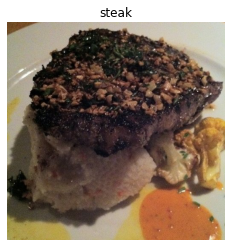

In [10]:
# View a random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class = "steak")

['755968.jpg']
Image shape: (512, 307, 3)


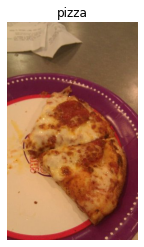

In [11]:
# View a random image from training dataset for pizza
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class = "pizza")

In [12]:
img # the mpimg library imported converts the image into a array

array([[[187, 161, 124],
        [184, 158, 121],
        [180, 154, 117],
        ...,
        [111,  85,  58],
        [113,  87,  60],
        [115,  89,  62]],

       [[182, 156, 119],
        [180, 154, 117],
        [180, 154, 117],
        ...,
        [110,  84,  57],
        [112,  86,  59],
        [113,  87,  60]],

       [[182, 156, 119],
        [183, 157, 120],
        [184, 158, 121],
        ...,
        [110,  84,  57],
        [111,  85,  58],
        [113,  87,  60]],

       ...,

       [[103,  27,  53],
        [104,  28,  54],
        [102,  28,  51],
        ...,
        [173, 133,  84],
        [173, 133,  84],
        [174, 134,  85]],

       [[107,  20,  52],
        [108,  23,  54],
        [107,  24,  54],
        ...,
        [174, 133,  87],
        [174, 133,  87],
        [175, 134,  88]],

       [[109,  18,  53],
        [111,  20,  55],
        [110,  20,  55],
        ...,
        [172, 131,  85],
        [173, 132,  86],
        [173, 132,  86]]

In [13]:
img.dtype

dtype('uint8')

In [14]:
import tensorflow as tf
tf.constant(img).shape

TensorShape([512, 307, 3])

In [15]:
# View the image shape
img.shape # returns a width, height , color channel

(512, 307, 3)

In [16]:
img/225.0  ## Normalizeing it

array([[[0.83111111, 0.71555556, 0.55111111],
        [0.81777778, 0.70222222, 0.53777778],
        [0.8       , 0.68444444, 0.52      ],
        ...,
        [0.49333333, 0.37777778, 0.25777778],
        [0.50222222, 0.38666667, 0.26666667],
        [0.51111111, 0.39555556, 0.27555556]],

       [[0.80888889, 0.69333333, 0.52888889],
        [0.8       , 0.68444444, 0.52      ],
        [0.8       , 0.68444444, 0.52      ],
        ...,
        [0.48888889, 0.37333333, 0.25333333],
        [0.49777778, 0.38222222, 0.26222222],
        [0.50222222, 0.38666667, 0.26666667]],

       [[0.80888889, 0.69333333, 0.52888889],
        [0.81333333, 0.69777778, 0.53333333],
        [0.81777778, 0.70222222, 0.53777778],
        ...,
        [0.48888889, 0.37333333, 0.25333333],
        [0.49333333, 0.37777778, 0.25777778],
        [0.50222222, 0.38666667, 0.26666667]],

       ...,

       [[0.45777778, 0.12      , 0.23555556],
        [0.46222222, 0.12444444, 0.24      ],
        [0.45333333, 0

## An end to end example

Let's build a convolutional neural network to find patterns in our images. We need to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our mode
* Fit the model on the training data


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all of pixel values between 0 and 1. This is called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to data directories (copy the path)
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                      
])



# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_1 = model_1.fit(train_data,  # The flow_from_directory already creates the train fdata and labels and hence we can pass it along just like that
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 201ms/step - loss: 0.6117 - accuracy: 0.6420 - val_loss: 0.4407 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4425 - accuracy: 0.7887 - val_loss: 0.3483 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3847 - accuracy: 0.8353 - val_loss: 0.3357 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3449 - accuracy: 0.8520 - val_loss: 0.3077 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3237 - accuracy: 0.8613 - val_loss: 0.2994 - val_accuracy: 0.8640


In [18]:
# The time taken to run without GPU (without hardware accelerator)

# Epoch 1/5
# 47/47 [==============================] - 96s 2s/step - loss: 0.6337 - accuracy: 0.6263 - val_loss: 0.3676 - val_accuracy: 0.8280
# Epoch 2/5
# 32/47 [===================>..........] - ETA: 27s - loss: 0.4547 - accuracy: 0.7910
# ---------------------------------------------------------------------------

**Note:** If the above cell is taking more than about 10-20 sec. per epochs than make sure to use GUP
Reuntime -> Change Runtime -> Hardware Accelerator -> GPU (you may have to run the entire code again)

In [19]:
len(train_data)

47

In [20]:
1500/32 #1500 images and 32 is batch size

46.875

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before (from the tendorflow playground)

Let's replicate the model built previously from the classification lecture.



In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate tensorflow playground model
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

# Compile data
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
histroy_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 1.2669 - accuracy: 0.4853 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [23]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite of having about 20X more parameters than out=r CNN model (model_1)
we had a worse performing model.
Let's try improving it|

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model to improve on model_2
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)


# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 2.7064 - accuracy: 0.5980 - val_loss: 1.3351 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.8587 - accuracy: 0.6987 - val_loss: 0.4893 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6699 - accuracy: 0.7467 - val_loss: 0.4331 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5130 - accuracy: 0.7753 - val_loss: 0.7021 - val_accuracy: 0.6840
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5093 - accuracy: 0.7620 - val_loss: 0.5076 - val_accuracy: 0.7640


In [25]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [26]:
15000000/31000 # 15 million parameters in model_3 and 31 thousand in model_1

483.8709677419355

## Binary Classification: Breaking it down

1. Become one with the data (visualize)
2. Preprocess the data (scale/ normalize, turn into batches, etc)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Reapeat unit satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3162376.jpg']
Image shape: (512, 512, 3)
['2481333.jpg']
Image shape: (512, 384, 3)


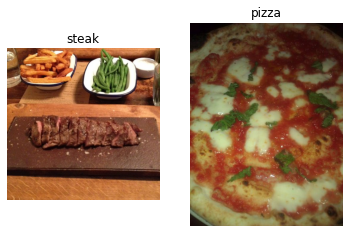

In [27]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_ima = view_random_image("pizza_steak/train/", "pizza")

On own

In [28]:
os.listdir("pizza_steak/train/pizza")

['474493.jpg',
 '2785084.jpg',
 '1312761.jpg',
 '1287004.jpg',
 '910419.jpg',
 '1097980.jpg',
 '579691.jpg',
 '2742044.jpg',
 '2587921.jpg',
 '413789.jpg',
 '3790235.jpg',
 '527199.jpg',
 '1947572.jpg',
 '1763205.jpg',
 '332231.jpg',
 '2274117.jpg',
 '896448.jpg',
 '3326344.jpg',
 '3399610.jpg',
 '998719.jpg',
 '1671531.jpg',
 '2224828.jpg',
 '302591.jpg',
 '1504719.jpg',
 '2014717.jpg',
 '2989328.jpg',
 '3382880.jpg',
 '1895479.jpg',
 '8917.jpg',
 '375401.jpg',
 '3557127.jpg',
 '3595758.jpg',
 '358178.jpg',
 '2032236.jpg',
 '3082068.jpg',
 '774142.jpg',
 '809024.jpg',
 '898843.jpg',
 '765000.jpg',
 '218711.jpg',
 '2044732.jpg',
 '3042454.jpg',
 '3342039.jpg',
 '543556.jpg',
 '1088332.jpg',
 '2312987.jpg',
 '2501961.jpg',
 '2255361.jpg',
 '1248346.jpg',
 '271675.jpg',
 '1269960.jpg',
 '1571074.jpg',
 '233143.jpg',
 '674188.jpg',
 '1964051.jpg',
 '626902.jpg',
 '1084888.jpg',
 '3384856.jpg',
 '3589437.jpg',
 '1608000.jpg',
 '1426781.jpg',
 '2697971.jpg',
 '276803.jpg',
 '338838.jpg',
 '

In [29]:
random.sample(os.listdir("pizza_steak/train/pizza"), 1)[0]

'2916034.jpg'

In [30]:
mpimg.imread("pizza_steak/train/pizza" + "/" + (random.sample(os.listdir("pizza_steak/train/pizza"), 1)[0]))

array([[[193, 186, 202],
        [191, 184, 200],
        [189, 182, 198],
        ...,
        [187, 184, 193],
        [186, 183, 192],
        [185, 182, 191]],

       [[191, 187, 202],
        [189, 185, 200],
        [187, 183, 198],
        ...,
        [187, 184, 193],
        [187, 184, 193],
        [187, 184, 193]],

       [[189, 185, 200],
        [188, 184, 199],
        [186, 182, 197],
        ...,
        [186, 183, 192],
        [187, 184, 193],
        [188, 185, 194]],

       ...,

       [[197, 193, 207],
        [196, 192, 206],
        [195, 191, 205],
        ...,
        [187, 180, 188],
        [185, 178, 186],
        [181, 174, 182]],

       [[195, 191, 205],
        [194, 190, 204],
        [193, 189, 203],
        ...,
        [184, 177, 185],
        [182, 175, 183],
        [180, 173, 181]],

       [[196, 192, 206],
        [195, 191, 205],
        [195, 191, 205],
        ...,
        [181, 174, 182],
        [180, 173, 181],
        [180, 173, 181]]

Text(0.5, 1.0, 'Pizza')

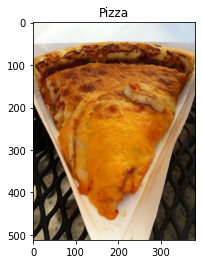

In [31]:
plt.imshow(mpimg.imread("pizza_steak/train/pizza" + "/" + (random.sample(os.listdir("pizza_steak/train/pizza"), 1)[0])))
plt.title("Pizza")

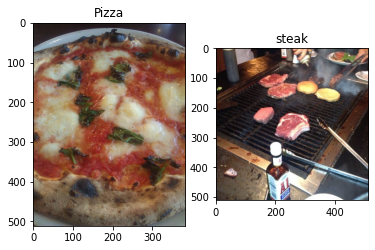

In [32]:
plt.subplot(1,2,1)
plt.imshow(mpimg.imread("pizza_steak/train/pizza" + "/" + (random.sample(os.listdir("pizza_steak/train/pizza"), 1)[0])))
plt.title("Pizza")
plt.subplot(1,2,2)
plt.imshow(mpimg.imread("pizza_steak/train/steak" + "/" + (random.sample(os.listdir("pizza_steak/train/steak"), 1)[0])))
plt.title("steak");

On own end

### 2. Preprocess the data (Prepare it for the model)

In [33]:
# Define directory dataset paths
tarin_dir = "pizza_steak/train/"
test_dir =  "pizza_steak/test/"

In [34]:
!nvidia-smi

Mon May 31 04:46:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Our next step is to turn data into **batches**

It is a small subset of data. So, for instance, instead of looking at 10000 data together, it might look at 32 or 64 at a time.


The reasons for doing so is:

1. 10000 or more data (images here) may not fir into the memory of our processor (GPU or CPU)

2. Trying to learn the patterns in 10000 images, say, in one hit may result in model not being able to learn very well.



Why 32?
Because it is goood for your health.. Tweet : https://twitter.com/ylecun/status/989610208497360896?s=20




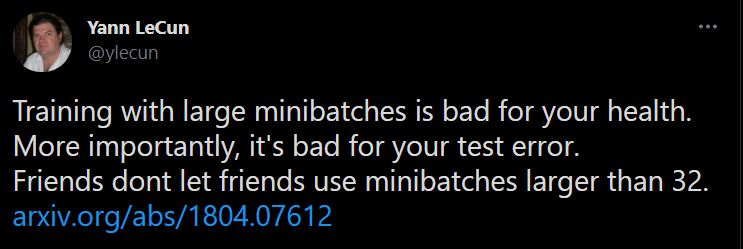

In [35]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale=1/255.)

In [36]:
# Load in image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary', 
                                               batch_size=32, 
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [37]:
# Get a sample of training batch 
images, labels = train_data.next() # Get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [38]:
images[0], labels[0]

(array([[[0.42352945, 0.43137258, 0.34509805],
         [0.31764707, 0.3254902 , 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34901962, 0.37254903],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],
 
        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.37647063],
         [0.39607847, 0.34901962, 0.3647059 ]],
 
        [[0.37254903, 0.39607847, 0.29411766],
         [0.39607847, 0.41960788, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.3019608 ],
         [0.30980393, 0.29803923, 0.27058825],
         [0.3372549 , 0.3254902 , 0.30588236]],
 
        ...,
 
        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509

In [39]:
# How many batches are there?
len(train_data)

47

In [40]:
1500/32  # 1500 images divided into 32 batches and rounded up

46.875

In [41]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [42]:
images[7].shape

(224, 224, 3)

In [43]:
# View the labels for the firt batch
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)


A baseline is a relatively simple model or existing result that we setup when beginning ML experimentation and then build it up iteratively



**Note:** In deep learning, there's always an infinite amount of architectures one could create. So start with a simple model and then build up a complexity

In [44]:
# MAke the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [45]:
# Create the model (this will be the baseline, a layer convolutional neural network)

model_4 = Sequential(
    [
     Conv2D(filters=10, # The number of sliding windows going over an input image. Higher the bnumber, more complex the model
            kernel_size=3, # The size of the sliding window across the input
            strides=1, # the size of the steps the sliding window takes across the image
            padding="valid", # if "same" output shape is same as input shape, if "valid" output is compressed
            activation="relu",
            input_shape=(224,224,3)),  ## Imput layer
     Conv2D(10,3, activation="relu"),
     Conv2D(10,3, activation="relu"),
     Flatten(),
     Dense(1, activation="sigmoid") # Output layer (working with binary classification hence only one neuron)
    ]
)

In [46]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [47]:
# Get a summary of the model of how input shape changes throughout
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [48]:
# Chek lengths of training and test data generator
len(train_data), len(test_data) ## batch size of 32

(47, 16)

In [49]:
#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 1.5697 - accuracy: 0.6307 - val_loss: 0.4710 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4478 - accuracy: 0.7973 - val_loss: 0.3700 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3603 - accuracy: 0.8580 - val_loss: 0.3948 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.2530 - accuracy: 0.9040 - val_loss: 0.3829 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.1338 - accuracy: 0.9573 - val_loss: 0.4388 - val_accuracy: 0.8140


### 5. Evaluating our model

Our model is learning something. Let's evaluate it


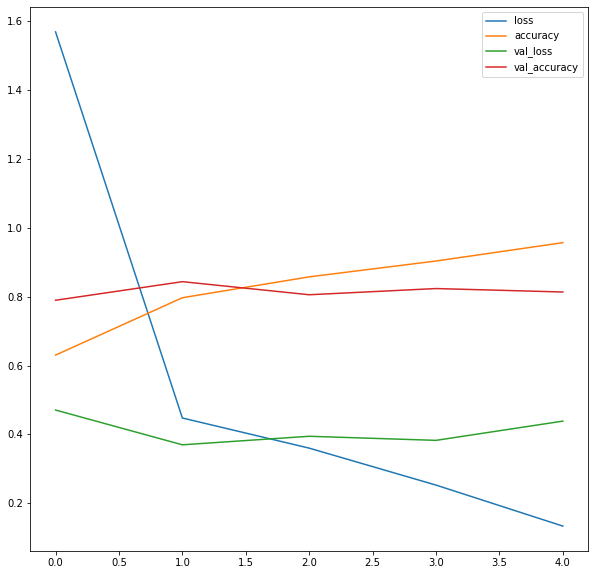

In [50]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,10))

In [51]:
# Plot the validation and training curves separately
def plot_loss_curve(history):
    """
    Returns separate loss curves for training and validation curves
    """
    loss= history.history["loss"]
    val_loss = history.history["val_loss"]


    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # How many epochs did the model train for

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()


    # Plot accuracy
    plt.figure()  ## for a new plot
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="validation_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the **model is overfitting** the training dataset.

That is it's learning the patterns in training data *too well* and model's ability to generalize on unseen daat is diminished

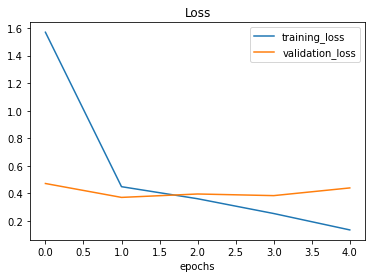

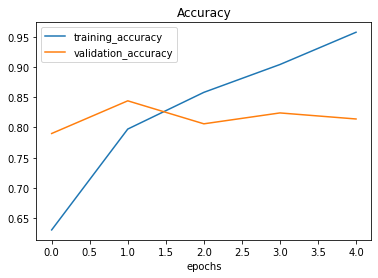

In [52]:
# Check out the loss and accuracy of model_4
plot_loss_curve(history_4)

**Note:** Generally the two loss curves (loss and validation) would be very similar (either both increasing or decreasing. It is when the curves show major discrepancies that the model has overfitting or underfitting)

On own

In [53]:
predictions = model_4.predict(test_data)
len(predictions)

500

In [54]:
data = []
i=1
for x in range(len(test_data)):
    i, l = test_data.next()
    data.extend(np.array(l))

In [55]:
predictions = np.ravel(np.round(predictions))

In [56]:
[predictions[i] == data[i] for i in range(len(data))]

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 T

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(data, predictions)

In [59]:
cm / 250.0

array([[0.608, 0.392],
       [0.588, 0.412]])

In [60]:
data = []
for x in range(len(test_data)):
    data.extend(test_data[x][1])

In [61]:
[predictions[i] == data[i] for i in range(len(data))]

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 T

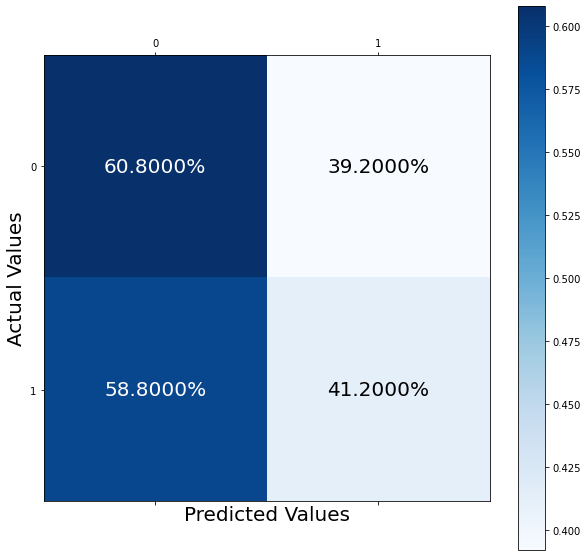

In [62]:
# Plot the confusion matrix

cm = cm / cm.sum(axis=1)
cm

fig, ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.matshow(cm, cmap=plt.cm.Blues))

ax.set_xlabel("Predicted Values", fontsize=20)
ax.set_ylabel("Actual Values", fontsize=20)

for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, f"{cm[i,j]*100:.04f}%",
                 horizontalalignment="center",
                 verticalalignment="center",
                 fontsize=20,
                 color = ("white" if cm[i,j]>0.5 else "black"))

On own end

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model_
2. Reduce overfitting




Ways to induce overfitting:
* Increae the number of conv layers
* Increae the number of conv filters
* Add another dense layer to the output of our flattened layer


Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data .....



**Note:**  Reducing overfitting is also known as regularization

In [63]:
# Create the model ( this is going to be our new base line)
model_5 = Sequential(
    [
     Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
     MaxPool2D(pool_size=2),
     Conv2D(10,3, activation="relu"),
     MaxPool2D(),
     Conv2D(10,3, activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1, activation="sigmoid")
    ]
)

In [64]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [65]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6073 - accuracy: 0.6733 - val_loss: 0.4775 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4499 - accuracy: 0.8033 - val_loss: 0.3592 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.3955 - accuracy: 0.8307 - val_loss: 0.3337 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.3816 - accuracy: 0.8300 - val_loss: 0.3924 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3632 - accuracy: 0.8507 - val_loss: 0.3357 - val_accuracy: 0.8600


In [66]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [67]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


Even when model_4 has 50X more trainable parameters, the model_5 outperforms it

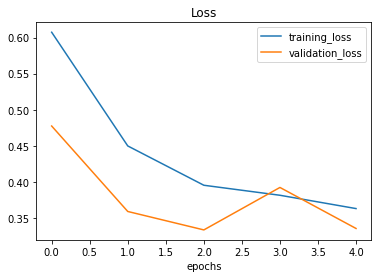

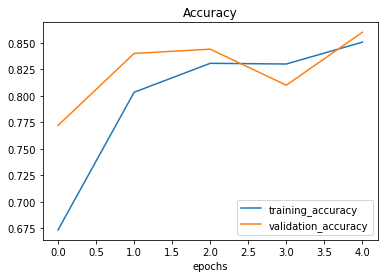

In [68]:
# Plot the loss curves
plot_loss_curve(history_5)

### Opening our bag of tricks and finding data Augmentation

In [69]:
# Create ImageDataGenerator training with data Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # How much do you want to rotate an image?
                                             shear_range=0.2, # How much do you want to sheer the image
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on x axis
                                             height_shift_range=0.2,  # move your image around on y axis
                                             horizontal_flip=True # do you want to flip an image
                                            )
# Create ImageDataGenerator without data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentaion for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?



Data augmentation is the process of altering the training data, leading it to have moree diversity and in turn allowing our model to learn more generalizable (hopefully) patterns. 
Alterning might mean ajdusting rotations of an image, flipping t, cropping it or something similar

<br>

Let's write some code to visualize data augmentation


In [70]:
# Import data and augmented from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) ## Only for demonstration. In actual practice shuffle should be true

# Create non-augmented data batches
print("Non-Augmented Training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False) 


# Create non-augmented testing data batches
print("Non-Augmented Test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary") 

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented Training data
Found 1500 images belonging to 2 classes.
Non-Augmented Test data
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed only on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they were in the directories but are modified as they are loaded into the model


Finally.. Let's visua;ize some augmented data

In [71]:
# Get some sample data

images, labels = train_data.next()
augmented_images, augmented_lables = train_data_augmented.next() # labels aren't augmented only images are

Showing image number: 21


(-0.5, 223.5, 223.5, -0.5)

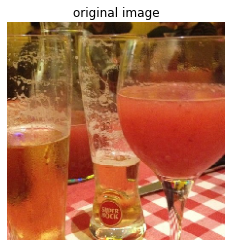

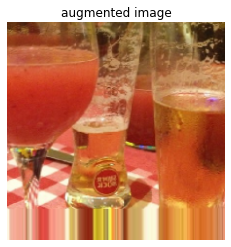

In [72]:
# Show original images and augemnted image

import random
random_number = random.randint(0,31) # because 32 is batch size and randint uses the lat input too
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("augmented image")
plt.axis(False)

Now we've seen what augmented data looks like. Lets build a model to see how it learns on Augmented data

In [73]:
tf.random.set_seed(42)

# Create a model
model_6 = Sequential(
    [
     Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
     MaxPool2D(pool_size=2),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(pool_size=2),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(pool_size=2),
     Flatten(),
     Dense(1, activation="sigmoid")
    ]
)

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model_6 on augmented traiing data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 424ms/step - loss: 0.7033 - accuracy: 0.3947 - val_loss: 0.6908 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 20s 423ms/step - loss: 0.6933 - accuracy: 0.5187 - val_loss: 0.6884 - val_accuracy: 0.5040
Epoch 3/5
47/47 [==============================] - 20s 417ms/step - loss: 0.7010 - accuracy: 0.6220 - val_loss: 1.0986 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 20s 418ms/step - loss: 0.7354 - accuracy: 0.4240 - val_loss: 0.6930 - val_accuracy: 0.5220
Epoch 5/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6931 - accuracy: 0.4987 - val_loss: 0.6908 - val_accuracy: 0.6520


Using data augmentation, the training takes a longer time. This is because data augmentation does not transform the images in the directory. They are transformed when they are loaded into the memory (CPU/ GPU) for model training. Hence it takes a bit more time.

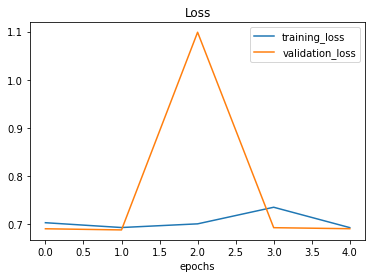

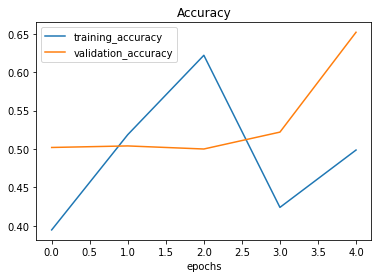

In [74]:
# Check our models training curve
plot_loss_curve(history_6)

Let's shuffle our augmented training data and train another model same as before and see what happens

In [75]:
# Import data and augment it and shuffle it from the training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [76]:
tf.random.set_seed(42)

# Create the model same as model_5 and model_6
model_7 = Sequential(
    [
     Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
     MaxPool2D(),
     Conv2D(10, 3, activation="relu"),
     MaxPool2D(),
     Conv2D(10, 3, activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1, activation="sigmoid")
    ]
)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 429ms/step - loss: 0.6460 - accuracy: 0.6120 - val_loss: 0.5565 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 20s 418ms/step - loss: 0.5476 - accuracy: 0.7287 - val_loss: 0.3695 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 20s 418ms/step - loss: 0.4868 - accuracy: 0.7673 - val_loss: 0.3507 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 20s 419ms/step - loss: 0.4629 - accuracy: 0.7853 - val_loss: 0.3553 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 20s 421ms/step - loss: 0.4669 - accuracy: 0.7820 - val_loss: 0.3040 - val_accuracy: 0.8780


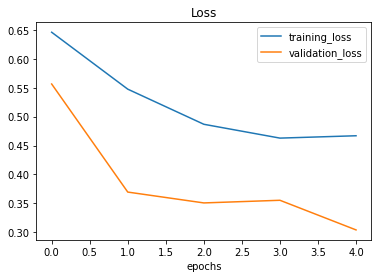

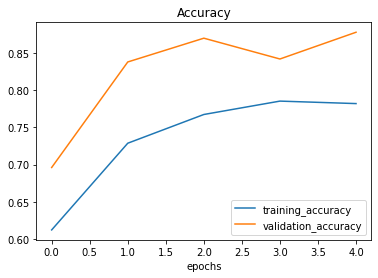

In [77]:
plot_loss_curve(history_7)

**Note:** When shuffling, the model the model get's exposed to all different kinds of training data thus enabling it to learn features acriss a wide array of images

### 7. Repeat until satisfiled


Since we've beaten our baseline there are a few things there are that we could continue to improve

* Increase the number of model layers (eg. add more `Conv2D` or 'MaxPool2D` layers)
* Increase the the number of filters (10, to 32 or 64 ... )
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (giving model more opportunities to learn)
* Use **transfer learning** to leverage what another model has learnt and adjust it for our own use case



**Practice :** Recreate the model on CNN explainer website and fit it on augented shuffled data

On Own

In [78]:
tf.random.set_seed(42)

# Create the model

my_model_1 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3)),
     tf.keras.layers.Activation('relu'),
     tf.keras.layers.Conv2D(10, 3),
     tf.keras.layers.Activation('relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Conv2D(10, 3),
     tf.keras.layers.Activation('relu'),
     tf.keras.layers.Conv2D(10, 3),
     tf.keras.layers.Activation('relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

# Compile the model

my_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

# Fit the model
my_history_1 = my_model_1.fit(train_data_augmented_shuffled,
                              epochs=5,
                              steps_per_epoch=len(train_data_augmented_shuffled),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 438ms/step - loss: 0.6261 - accuracy: 0.6333 - val_loss: 0.4489 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 20s 431ms/step - loss: 0.4944 - accuracy: 0.7620 - val_loss: 0.3611 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 20s 430ms/step - loss: 0.4928 - accuracy: 0.7767 - val_loss: 0.3339 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 20s 433ms/step - loss: 0.4582 - accuracy: 0.7893 - val_loss: 0.4273 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 20s 428ms/step - loss: 0.4371 - accuracy: 0.7987 - val_loss: 0.3068 - val_accuracy: 0.8660


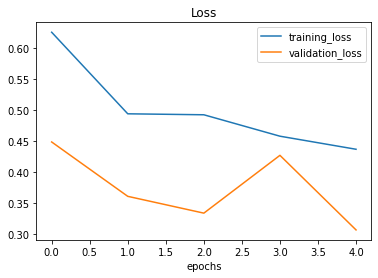

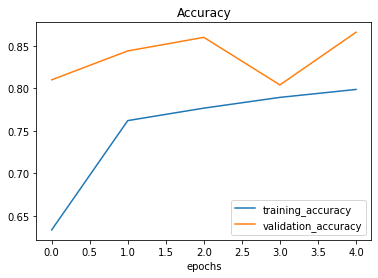

In [79]:
# Check out the loss curve 
plot_loss_curve(my_history_1)

On own end

## Making predictions with our trained model on our own custom data

In [80]:
print(class_names)

['pizza' 'steak']


--2021-05-31 04:53:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2021-05-31 04:53:19 (98.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

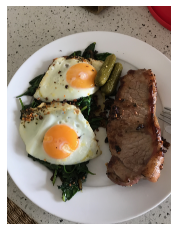

In [81]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [82]:
# Check the shape of the image
steak.shape

(4032, 3024, 3)

**Note:**: When you make predictions with your model on your own data, make sure that they are preprocessed in the same format as the model's training data was

In [83]:
# Create a function to import an image and resize it to be able to be used by our mode
def load_and_prep_image(filename, img_shape=224):
    """
    Reads the image from filename and and reshapes it into 
    (img_shape, img_shape, color_channels)
    """

    # Reads the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255. 
    return img

In [84]:
# Load in and preproecess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [85]:
pred = model_7.predict(tf.expand_dims(steak, axis=0)) # It will work on a 4 d data (because of a batchsize)

In [86]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [87]:
model_7.predict(expanded_steak)

array([[0.83254874]], dtype=float32)

Looks like our custom image is being put through our model. However, it currently outputs a prediction probability. Let us visualize the image as well as the prediction preobability

In [88]:
# Reminding ourselves of the class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [89]:
# We can index on the class_names by rounding up the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [90]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a predicton with 
    model and plots the image with predicted class as the title
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class 
    pred_class = class_names[int(tf.round(pred))]

    # plot the image and the predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

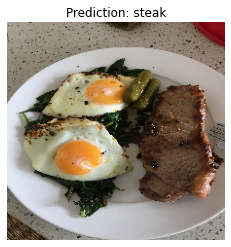

In [91]:
pred_and_plot(model_7, "03-steak.jpeg")

Our model works!!!!!! Let's try on another image.. this time a pizza

--2021-05-31 04:53:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-05-31 04:53:22 (49.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



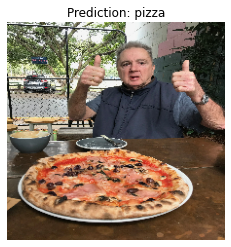

In [92]:
# Download another test custom image and make a prediction on it
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it and make sure it works)
5. Evaluate the model
6. Adjust the different hyperparameters and improve the model (try to beat baseline/ reduce overfitting)
7. Repeat until satisfied


### 1. Become one with the data

In [93]:
import zipfile

! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-05-31 04:53:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.251.33.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   249MB/s    in 2.0s    

2021-05-31 04:53:24 (249 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [94]:
import os

# walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 10 directories and 0 images in 10_fo

In [95]:
! ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 May 31 04:53 .
drwxr-xr-x  1 root root 4096 May 31 04:53 ..
drwxr-xr-x 12 root root 4096 May 31 04:53 test
drwxr-xr-x 12 root root 4096 May 31 04:53 train


In [96]:
# Set up the train and test directory
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [97]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1004867.jpg']
Image shape: (512, 512, 3)


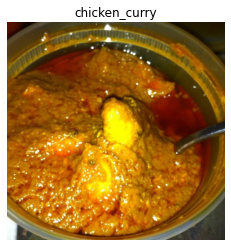

In [98]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                                     target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [101]:
# Create the model (similar to model_7 and resembling tensorflow explainer website)

model_8 = Sequential(
    [
     Conv2D(10, 3, input_shape=(224, 224, 3)),
     Activation(activation='relu'),
     Conv2D(10,3, activation = 'relu'),
     MaxPool2D(),
     Conv2D(10, 3, activation='relu'),
     Conv2D(10, 3, activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation='softmax')  # Changed to have 10 output neurons anf use softmax activation
    #  Activation('softmax') # Could have done this as well
    ]
)

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


### 4. Fit the model

In [102]:
# fit the model
history_8 = model_8.fit(train_data,  ## now has 10 classes
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))  # for faster validation sometimes we do 0.25 * len(test_data)

Epoch 1/5
235/235 [==============================] - 44s 187ms/step - loss: 2.1319 - accuracy: 0.2312 - val_loss: 1.9726 - val_accuracy: 0.3124
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.8485 - accuracy: 0.3635 - val_loss: 1.8060 - val_accuracy: 0.3660
Epoch 3/5
235/235 [==============================] - 43s 184ms/step - loss: 1.5329 - accuracy: 0.4860 - val_loss: 1.9105 - val_accuracy: 0.3436
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.9917 - accuracy: 0.6721 - val_loss: 2.4497 - val_accuracy: 0.3060
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.4411 - accuracy: 0.8593 - val_loss: 3.3419 - val_accuracy: 0.2900


### 5. Evaluate the model

In [103]:
# Evaluate the test data 
model_8.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 3.3419 - accuracy: 0.2900


[3.3419010639190674, 0.28999999165534973]

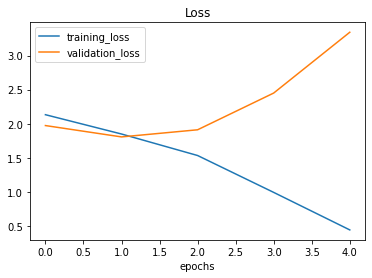

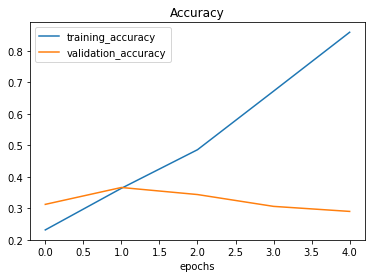

In [104]:
# Checkout the model's loss curve
plot_loss_curve(history_8)

What do these loss curves tell us?


Well... it seems that our model is **overfitting** the training set quite badly. It fits quite well on the training data but it is not able to generalize well on the testing data

### 6. Adjust the hyperparameters ( to beat the baseline/ reduce overfitting)


Due to it's performance on training data, the model is definitely learning something

But it's not generalizing well on unseen data

So what can we do to fix overfitting

* **Get more data**- Having more data gives a model opportunity to learn diverse patterns

* **Simplify the model** - if the current model is overfitting, it may be too complicated of a model, one way to simplify it is to : 
1. reduce the number of layers 
2. reduce hidden units in the layer

* **Use data augmentation** - data augmentation manipulates the training data in such a way as to add more diversity to it (without altering the original data)

* **Use transfer learning** - transfer learning leverages the pattern another model has learned on similar data to allow you to use those patterns on your own data

In [105]:
# how about we try an dsimplify the model first
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_4 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)       

In [110]:
# Let's try to remove 2 convolution layer

model_9 = Sequential(
    [
     Conv2D(10, 3, activation = 'relu', input_shape= (224, 224, 3)),
     MaxPool2D(),
     Conv2D(10, 3, activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation = 'softmax')
    ]
)

model_9.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [111]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [112]:
# fit the model with 2 conv2D layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 174ms/step - loss: 2.0777 - accuracy: 0.2583 - val_loss: 1.9531 - val_accuracy: 0.3172
Epoch 2/5
235/235 [==============================] - 40s 172ms/step - loss: 1.7029 - accuracy: 0.4340 - val_loss: 1.8849 - val_accuracy: 0.3536
Epoch 3/5
235/235 [==============================] - 41s 173ms/step - loss: 1.2494 - accuracy: 0.5988 - val_loss: 1.9820 - val_accuracy: 0.3460
Epoch 4/5
235/235 [==============================] - 41s 173ms/step - loss: 0.7318 - accuracy: 0.7791 - val_loss: 2.3875 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 41s 174ms/step - loss: 0.3577 - accuracy: 0.9080 - val_loss: 2.8248 - val_accuracy: 0.3080


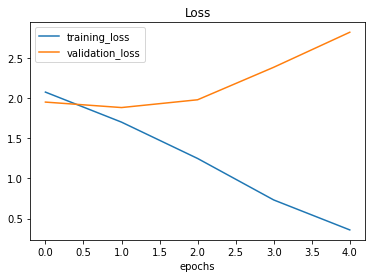

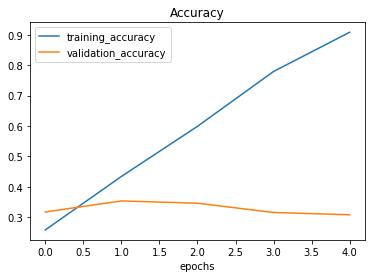

In [113]:
# Check out the loss curves
plot_loss_curve(history_9)

In [114]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [115]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_4 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)       

Looks like our "simplifying the model" experiment didn't work and the accuracy went down and overfitting continued...

(If we look, model 8 has actually less trainable parameters than model 9 so it makes sense)

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve the result of our model by using augmented data

Ideally we want to:

*  Reduce overfitting (getting the trian and validation curves to come closer)
* Improve the validation accuracy


In [118]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True)

Found 7500 images belonging to 10 classes.


In [119]:
# Lets create another model and let's fit it on augmented training data
model_10 = tf.keras.models.clone_model(model_8)  ##  Creating the same model as 8 with same architecture but new layers and weight and biases

# compile the cloned model (using the same setup as previous model)
model_10.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [120]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_4 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)       

This is exaclty like model 8

In [122]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_4 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)       

In [123]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 100s 423ms/step - loss: 2.2021 - accuracy: 0.1833 - val_loss: 2.0389 - val_accuracy: 0.2472
Epoch 2/5
235/235 [==============================] - 99s 422ms/step - loss: 2.0898 - accuracy: 0.2441 - val_loss: 1.9426 - val_accuracy: 0.3332
Epoch 3/5
235/235 [==============================] - 99s 422ms/step - loss: 2.0031 - accuracy: 0.2964 - val_loss: 1.8258 - val_accuracy: 0.3740
Epoch 4/5
235/235 [==============================] - 99s 422ms/step - loss: 1.9547 - accuracy: 0.3153 - val_loss: 1.8642 - val_accuracy: 0.3456
Epoch 5/5
235/235 [==============================] - 99s 422ms/step - loss: 1.9162 - accuracy: 0.3364 - val_loss: 1.8510 - val_accuracy: 0.3724


In [124]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 3.3419 - accuracy: 0.2900


[3.3419015407562256, 0.28999999165534973]

In [125]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.8510 - accuracy: 0.3724


[1.8509949445724487, 0.3723999857902527]

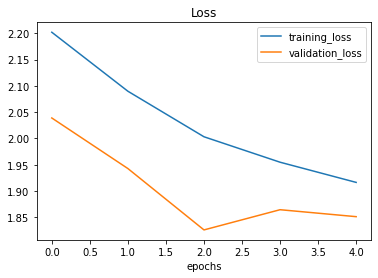

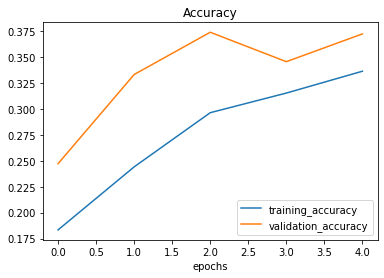

In [126]:
plot_loss_curve(history_10)

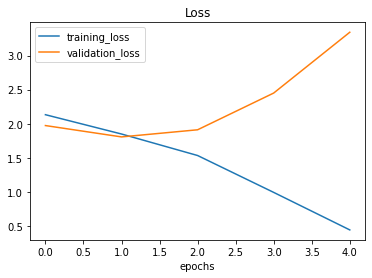

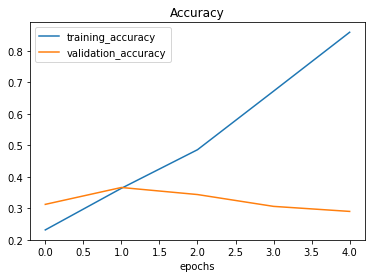

In [127]:
plot_loss_curve(history_8)

The newer loss curves look much better and they are closer to each other than the baseline, and they seem to go in the right direction. 

Lets see how we might make further improvements

### 7. Repeat until satisfied

We could keep going .. continually trying to bring our loss curves closer together and trying to improve the validationa and test accuracy

How?

By running lots of experiments:

- restructure the model's architecture (increaing the layers/ hidden units/ filters)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (10 epochs instead of 5)
- try transfer learning

### Make prediction with our trained model 

Let's use our trained model to make prediction on our wo custom data

In [129]:
# Let's remind ourselves of the class names
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [130]:
# Download custom data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-05-31 06:04:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.05s   

2021-05-31 06:04:07 (64.8 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2021-05-31 06:04:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [136]:
# reconfigure pred_and plot function to allow it to work with multi class classification as well
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a predicton with 
    model and plots the image with predicted class as the title
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # add in logic for multi-class and get pred class name
    if(len(pred[0])) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]

    

    # plot the image and the predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

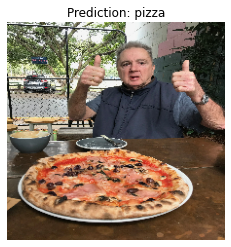

In [137]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename= '03-pizza-dad.jpeg',
              class_names= class_names)

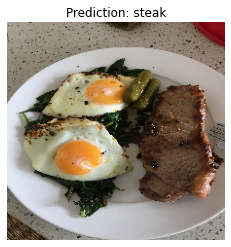

In [140]:
pred_and_plot(model=model_10,
              filename= '03-steak.jpeg',
              class_names= class_names)

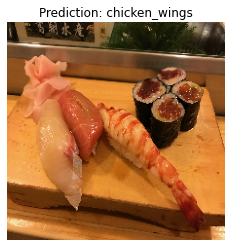

In [141]:
pred_and_plot(model=model_10,
              filename= '03-sushi.jpeg',
              class_names= class_names)

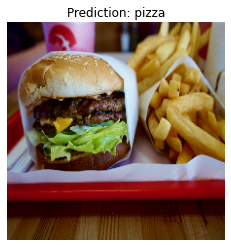

In [142]:
pred_and_plot(model=model_10,
              filename= '03-hamburger.jpeg',
              class_names= class_names)

Looks like our model didn't perform very well on our custom images but thats because we achieved a low accuracy only

## Saving and loading our model

In [144]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [145]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.8510 - accuracy: 0.3724


[1.8509950637817383, 0.3723999857902527]

In [146]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.8510 - accuracy: 0.3724


[1.8509949445724487, 0.3723999857902527]

I fyou see both loaded and existing value, we find that for the first 7-8 decimal points, it matches and then it divergers. This is because of how computers store and represent numbers. This however has negligible effect on model's accuracy and performance